## 학습목표
 1. 탐색적 데이터 분석과정에 대해 이해한다. 
 1. Dataframe boolean selection 이해한다.
 1. Dataframe에 새로운 colum을 추가할 수 있다.
 1. Dataframe에 column 삭제할 수 있다. 
 1. NaN데이터를 이해하고 처리할 수 있다.

### 1. 탐색적 데이터 분석 과정  (Exploratory Data Analysis)
- 데이터 분석을 위해 raw data를 다양한 각도에서 관찰하여, 데이터를 이해하는 과정이다.
  - 데이터 분석 주제마다 EDA를 통해 진행하는 과정은 너무 다양하다. 그러므로 정형화된 패턴은 없다. 
  - 다음과 같은 3가지 과정은 기본이 될 수 있으므로 다음 3가지 과정을 기본으로 이해해보자.

    1. 데이터의 출처와 주제에 대해 이해
    2. 데이터의 크기 확인
    3. 데이터 구성 요소(feature)의 속성(특징) 확인
       - feature: 데이터 구성 요소를 위미한다.
       - 예: 사원정보를 기록한 데이터가 있다면, 사원번호, 사원이름, 급여등을 feature로 볼 수 있음 
       
       
https://ko.wikipedia.org/wiki/%ED%83%90%EC%83%89%EC%A0%81_%EC%9E%90%EB%A3%8C_%EB%B6%84%EC%84%9D

In [1]:
import pandas as pd

In [2]:
import cx_Oracle
import pandas as pd
conn = cx_Oracle.connect('hr/hr@127.0.0.1:1521/xe')

In [3]:
df_employees = pd.read_sql("select * from employees",con=conn)
df_employees.to_csv('employees.csv', encoding='utf-8-sig')

In [4]:
df_locations = pd.read_sql("select * from LOCATIONS",con=conn)
df_locations.to_csv('locations.csv', encoding='utf-8-sig')

### 1. 탐색적 데이터 분석: 데이터의 출처와 주제에 대해 이해 

- 오라클 데이터 베이스가 샘플 데이터로 제공
- 사원에 대한 정보를 담고있음 


### 2. 탐색적 데이터 분석: 데이터의 크기 확인

In [5]:
df_employees.head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID
0,100,Steven,King,SKING,515.123.4567,2003-06-17,AD_PRES,24000.0,NaN,NaN,90.0
1,101,Neena,Kochhar,NKOCHHAR,515.123.4568,2005-09-21,AD_VP,17000.0,NaN,100.0,90.0
2,102,Lex,De Haan,LDEHAAN,515.123.4569,2001-01-13,AD_VP,17000.0,NaN,100.0,90.0
3,103,Alexander,Hunold,AHUNOLD,590.423.4567,2006-01-03,IT_PROG,9000.0,NaN,102.0,60.0
4,104,Bruce,Ernst,BERNST,590.423.4568,2007-05-21,IT_PROG,6000.0,NaN,103.0,60.0


In [6]:
df_employees.tail()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID
102,202,Pat,Fay,PFAY,603.123.6666,2005-08-17,MK_REP,6000.0,NaN,201.0,20.0
103,203,Susan,Mavris,SMAVRIS,515.123.7777,2002-06-07,HR_REP,6500.0,NaN,101.0,40.0
104,204,Hermann,Baer,HBAER,515.123.8888,2002-06-07,PR_REP,10000.0,NaN,101.0,70.0
105,205,Shelley,Higgins,SHIGGINS,515.123.8080,2002-06-07,AC_MGR,12008.0,NaN,101.0,110.0
106,206,William,Gietz,WGIETZ,515.123.8181,2002-06-07,AC_ACCOUNT,8300.0,NaN,205.0,110.0


In [7]:
df_employees.shape

(107, 11)

In [8]:
df_employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 11 columns):
EMPLOYEE_ID       107 non-null int64
FIRST_NAME        107 non-null object
LAST_NAME         107 non-null object
EMAIL             107 non-null object
PHONE_NUMBER      107 non-null object
HIRE_DATE         107 non-null datetime64[ns]
JOB_ID            107 non-null object
SALARY            107 non-null float64
COMMISSION_PCT    35 non-null float64
MANAGER_ID        106 non-null float64
DEPARTMENT_ID     106 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 9.3+ KB


### 3. 탐색적 데이터 분석:  데이터 구성 요소(feature)의 속성(특징) 확인

1. 각 column 이해하기.
    - raw data에는 다양한 column 이 있는 경우가 많고, 이 중에서 내가 사용할 column 에 대해서는 확실히 이해하고 있어야 한다.

In [10]:
df_employees.columns

Index(['EMPLOYEE_ID', 'FIRST_NAME', 'LAST_NAME', 'EMAIL', 'PHONE_NUMBER',
       'HIRE_DATE', 'JOB_ID', 'SALARY', 'COMMISSION_PCT', 'MANAGER_ID',
       'DEPARTMENT_ID'],
      dtype='object')

In [11]:
df_employees.describe()

,EMPLOYEE_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID
count,107.000000,107.000000,35.000000,106.000000,106.000000
mean,153.000000,6461.831776,0.222857,124.764151,63.207547
std,31.032241,3909.579731,0.085184,20.315395,20.910110
min,100.000000,2100.000000,0.100000,100.000000,10.000000
25%,126.500000,3100.000000,0.150000,108.000000,50.000000
50%,153.000000,6200.000000,0.200000,122.000000,50.000000
75%,179.500000,8900.000000,0.300000,145.000000,80.000000
max,206.000000,24000.000000,0.400000,205.000000,110.000000


In [9]:
df_employees.corr()

,EMPLOYEE_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID
EMPLOYEE_ID,1.000000,-0.150071,-0.554287,0.446808,-0.087183
SALARY,-0.150071,1.000000,0.726034,-0.000275,0.625417
COMMISSION_PCT,-0.554287,0.726034,1.000000,-0.397646,NaN
MANAGER_ID,0.446808,-0.000275,-0.397646,1.000000,0.262926
DEPARTMENT_ID,-0.087183,0.625417,NaN,0.262926,1.000000


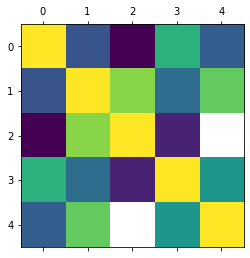

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.matshow(df_employees.corr())

#### **boolean selection으로 row 선택하기**
 - numpy에서와 동일한 방식으로 해당 조건에 맞는 row만 선택한다. 

In [15]:
df_dept = pd.read_csv('dept.csv')

In [16]:
df_dept.LOCATION_ID >= 1800

0     False
1      True
2     False
3      True
4     False
5     False
6      True
7      True
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
Name: LOCATION_ID, dtype: bool

In [17]:
df_dept[df_dept.LOCATION_ID >= 1800]   # TRUE인것만 리턴

,Unnamed: 0,DEPARTMENT_ID,DEPARTMENT_NAME,MANAGER_ID,LOCATION_ID
1,1,20,Marketing,201.0,1800
3,3,40,Human Resources,203.0,2400
6,6,70,Public Relations,204.0,2700
7,7,80,Sales,145.0,2500


In [19]:
df_dept[(df_dept.LOCATION_ID >= 1800) & (df_dept.DEPARTMENT_NAME == 'Sales')]

,Unnamed: 0,DEPARTMENT_ID,DEPARTMENT_NAME,MANAGER_ID,LOCATION_ID
7,7,80,Sales,145.0,2500


#### column 추가하기
 - [] 사용하여 컬럼을 추가한다.
 - insert 함수 사용하여 원하는 위치에 컬럼을 추가한다.

In [20]:
df_employees

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID
0,100,Steven,King,SKING,515.123.4567,2003-06-17,AD_PRES,24000.0,NaN,NaN,90.0
1,101,Neena,Kochhar,NKOCHHAR,515.123.4568,2005-09-21,AD_VP,17000.0,NaN,100.0,90.0
2,102,Lex,De Haan,LDEHAAN,515.123.4569,2001-01-13,AD_VP,17000.0,NaN,100.0,90.0
3,103,Alexander,Hunold,AHUNOLD,590.423.4567,2006-01-03,IT_PROG,9000.0,NaN,102.0,60.0
4,104,Bruce,Ernst,BERNST,590.423.4568,2007-05-21,IT_PROG,6000.0,NaN,103.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...
102,202,Pat,Fay,PFAY,603.123.6666,2005-08-17,MK_REP,6000.0,NaN,201.0,20.0
103,203,Susan,Mavris,SMAVRIS,515.123.7777,2002-06-07,HR_REP,6500.0,NaN,101.0,40.0
104,204,Hermann,Baer,HBAER,515.123.8888,2002-06-07,PR_REP,10000.0,NaN,101.0,70.0
105,205,Shelley,Higgins,SHIGGINS,515.123.8080,2002-06-07,AC_MGR,12008.0,NaN,101.0,110.0


In [21]:
df_employees['DOUBLE_SALARY'] = df_employees['SALARY'] *2
df_employees.head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID,DOUBLE_SALARY
0,100,Steven,King,SKING,515.123.4567,2003-06-17,AD_PRES,24000.0,NaN,NaN,90.0,48000.0
1,101,Neena,Kochhar,NKOCHHAR,515.123.4568,2005-09-21,AD_VP,17000.0,NaN,100.0,90.0,34000.0
2,102,Lex,De Haan,LDEHAAN,515.123.4569,2001-01-13,AD_VP,17000.0,NaN,100.0,90.0,34000.0
3,103,Alexander,Hunold,AHUNOLD,590.423.4567,2006-01-03,IT_PROG,9000.0,NaN,102.0,60.0,18000.0
4,104,Bruce,Ernst,BERNST,590.423.4568,2007-05-21,IT_PROG,6000.0,NaN,103.0,60.0,12000.0


In [23]:
#NAN값은 어찌하지?

df_employees['ANNUAL_SALARY'] = df_employees['SALARY'] *12 + df_employees['COMMISSION_PCT']  
df_employees.head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID,DOUBLE_SALARY,ANNUAL_SALARY
0,100,Steven,King,SKING,515.123.4567,2003-06-17,AD_PRES,24000.0,NaN,NaN,90.0,48000.0,NaN
1,101,Neena,Kochhar,NKOCHHAR,515.123.4568,2005-09-21,AD_VP,17000.0,NaN,100.0,90.0,34000.0,NaN
2,102,Lex,De Haan,LDEHAAN,515.123.4569,2001-01-13,AD_VP,17000.0,NaN,100.0,90.0,34000.0,NaN
3,103,Alexander,Hunold,AHUNOLD,590.423.4567,2006-01-03,IT_PROG,9000.0,NaN,102.0,60.0,18000.0,NaN
4,104,Bruce,Ernst,BERNST,590.423.4568,2007-05-21,IT_PROG,6000.0,NaN,103.0,60.0,12000.0,NaN


In [24]:
df_employees['ANNUAL_SALARY'] = df_employees['SALARY'] *12
df_employees.head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID,DOUBLE_SALARY,ANNUAL_SALARY
0,100,Steven,King,SKING,515.123.4567,2003-06-17,AD_PRES,24000.0,NaN,NaN,90.0,48000.0,288000.0
1,101,Neena,Kochhar,NKOCHHAR,515.123.4568,2005-09-21,AD_VP,17000.0,NaN,100.0,90.0,34000.0,204000.0
2,102,Lex,De Haan,LDEHAAN,515.123.4569,2001-01-13,AD_VP,17000.0,NaN,100.0,90.0,34000.0,204000.0
3,103,Alexander,Hunold,AHUNOLD,590.423.4567,2006-01-03,IT_PROG,9000.0,NaN,102.0,60.0,18000.0,108000.0
4,104,Bruce,Ernst,BERNST,590.423.4568,2007-05-21,IT_PROG,6000.0,NaN,103.0,60.0,12000.0,72000.0


In [25]:
df_employees.insert(8, 'test', df_employees['SALARY'] * 12)  #인덱스, 컬럼명, 조건
df_employees

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,test,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID,DOUBLE_SALARY,ANNUAL_SALARY
0,100,Steven,King,SKING,515.123.4567,2003-06-17,AD_PRES,24000.0,288000.0,NaN,NaN,90.0,48000.0,288000.0
1,101,Neena,Kochhar,NKOCHHAR,515.123.4568,2005-09-21,AD_VP,17000.0,204000.0,NaN,100.0,90.0,34000.0,204000.0
2,102,Lex,De Haan,LDEHAAN,515.123.4569,2001-01-13,AD_VP,17000.0,204000.0,NaN,100.0,90.0,34000.0,204000.0
3,103,Alexander,Hunold,AHUNOLD,590.423.4567,2006-01-03,IT_PROG,9000.0,108000.0,NaN,102.0,60.0,18000.0,108000.0
4,104,Bruce,Ernst,BERNST,590.423.4568,2007-05-21,IT_PROG,6000.0,72000.0,NaN,103.0,60.0,12000.0,72000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,202,Pat,Fay,PFAY,603.123.6666,2005-08-17,MK_REP,6000.0,72000.0,NaN,201.0,20.0,12000.0,72000.0
103,203,Susan,Mavris,SMAVRIS,515.123.7777,2002-06-07,HR_REP,6500.0,78000.0,NaN,101.0,40.0,13000.0,78000.0
104,204,Hermann,Baer,HBAER,515.123.8888,2002-06-07,PR_REP,10000.0,120000.0,NaN,101.0,70.0,20000.0,120000.0
105,205,Shelley,Higgins,SHIGGINS,515.123.8080,2002-06-07,AC_MGR,12008.0,144096.0,NaN,101.0,110.0,24016.0,144096.0


In [30]:
df_employees.corr()

,EMPLOYEE_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID,DOUBLE_SALARY,ANNUAL_SALARY
EMPLOYEE_ID,1.000000,-0.150071,-0.554287,0.446808,-0.087183,-0.150071,-0.150071
SALARY,-0.150071,1.000000,0.726034,-0.000275,0.625417,1.000000,1.000000
COMMISSION_PCT,-0.554287,0.726034,1.000000,-0.397646,NaN,0.726034,0.726034
MANAGER_ID,0.446808,-0.000275,-0.397646,1.000000,0.262926,-0.000275,-0.000275
DEPARTMENT_ID,-0.087183,0.625417,NaN,0.262926,1.000000,0.625417,0.625417
DOUBLE_SALARY,-0.150071,1.000000,0.726034,-0.000275,0.625417,1.000000,1.000000
ANNUAL_SALARY,-0.150071,1.000000,0.726034,-0.000275,0.625417,1.000000,1.000000


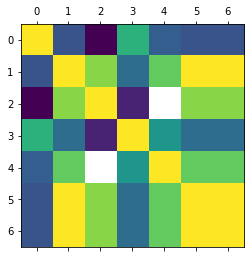

In [32]:
%matplotlib inline
plt.matshow(df_employees.corr())

#### column 삭제하기
 - drop 함수 사용하여 삭제
   - 리스트를 사용하여 멀티플 삭제 가능 

In [27]:
df_employees.drop('test', axis = 1)  #axis를 무조건 부여.

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID,DOUBLE_SALARY,ANNUAL_SALARY
0,100,Steven,King,SKING,515.123.4567,2003-06-17,AD_PRES,24000.0,NaN,NaN,90.0,48000.0,288000.0
1,101,Neena,Kochhar,NKOCHHAR,515.123.4568,2005-09-21,AD_VP,17000.0,NaN,100.0,90.0,34000.0,204000.0
2,102,Lex,De Haan,LDEHAAN,515.123.4569,2001-01-13,AD_VP,17000.0,NaN,100.0,90.0,34000.0,204000.0
3,103,Alexander,Hunold,AHUNOLD,590.423.4567,2006-01-03,IT_PROG,9000.0,NaN,102.0,60.0,18000.0,108000.0
4,104,Bruce,Ernst,BERNST,590.423.4568,2007-05-21,IT_PROG,6000.0,NaN,103.0,60.0,12000.0,72000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,202,Pat,Fay,PFAY,603.123.6666,2005-08-17,MK_REP,6000.0,NaN,201.0,20.0,12000.0,72000.0
103,203,Susan,Mavris,SMAVRIS,515.123.7777,2002-06-07,HR_REP,6500.0,NaN,101.0,40.0,13000.0,78000.0
104,204,Hermann,Baer,HBAER,515.123.8888,2002-06-07,PR_REP,10000.0,NaN,101.0,70.0,20000.0,120000.0
105,205,Shelley,Higgins,SHIGGINS,515.123.8080,2002-06-07,AC_MGR,12008.0,NaN,101.0,110.0,24016.0,144096.0


In [28]:
df_employees.head()   #test는 사라지지 않음. 즉, drop은 원본 삭제가 아닌 복사본 출력

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,test,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID,DOUBLE_SALARY,ANNUAL_SALARY
0,100,Steven,King,SKING,515.123.4567,2003-06-17,AD_PRES,24000.0,288000.0,NaN,NaN,90.0,48000.0,288000.0
1,101,Neena,Kochhar,NKOCHHAR,515.123.4568,2005-09-21,AD_VP,17000.0,204000.0,NaN,100.0,90.0,34000.0,204000.0
2,102,Lex,De Haan,LDEHAAN,515.123.4569,2001-01-13,AD_VP,17000.0,204000.0,NaN,100.0,90.0,34000.0,204000.0
3,103,Alexander,Hunold,AHUNOLD,590.423.4567,2006-01-03,IT_PROG,9000.0,108000.0,NaN,102.0,60.0,18000.0,108000.0
4,104,Bruce,Ernst,BERNST,590.423.4568,2007-05-21,IT_PROG,6000.0,72000.0,NaN,103.0,60.0,12000.0,72000.0


In [29]:
del df_employees['test']
df_employees.head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID,DOUBLE_SALARY,ANNUAL_SALARY
0,100,Steven,King,SKING,515.123.4567,2003-06-17,AD_PRES,24000.0,NaN,NaN,90.0,48000.0,288000.0
1,101,Neena,Kochhar,NKOCHHAR,515.123.4568,2005-09-21,AD_VP,17000.0,NaN,100.0,90.0,34000.0,204000.0
2,102,Lex,De Haan,LDEHAAN,515.123.4569,2001-01-13,AD_VP,17000.0,NaN,100.0,90.0,34000.0,204000.0
3,103,Alexander,Hunold,AHUNOLD,590.423.4567,2006-01-03,IT_PROG,9000.0,NaN,102.0,60.0,18000.0,108000.0
4,104,Bruce,Ernst,BERNST,590.423.4568,2007-05-21,IT_PROG,6000.0,NaN,103.0,60.0,12000.0,72000.0


In [34]:
df_employees.drop(['DOUBLE_SALARY', 'ANNUAL_SALARY'],axis = 1, inplace = True)

In [35]:
df_employees.head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID
0,100,Steven,King,SKING,515.123.4567,2003-06-17,AD_PRES,24000.0,NaN,NaN,90.0
1,101,Neena,Kochhar,NKOCHHAR,515.123.4568,2005-09-21,AD_VP,17000.0,NaN,100.0,90.0
2,102,Lex,De Haan,LDEHAAN,515.123.4569,2001-01-13,AD_VP,17000.0,NaN,100.0,90.0
3,103,Alexander,Hunold,AHUNOLD,590.423.4567,2006-01-03,IT_PROG,9000.0,NaN,102.0,60.0
4,104,Bruce,Ernst,BERNST,590.423.4568,2007-05-21,IT_PROG,6000.0,NaN,103.0,60.0
